In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
data_url ='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/weight_loss.csv'
data = pd.read_csv(data_url,header=None,names=['GrpA','GrpB'])

In [4]:
data.head()

,GrpA,GrpB
0,3,5
1,2,4
2,3,5
3,4,5
4,3,4


null hypothesis : Mean of weight loss A - Mean of weight loss A =0<br>
Alternative hypothesis : Mean of weight loss A - Mean of weight loss A >0

In [5]:
data.describe()

,GrpA,GrpB
count,50.000000,50.000000
mean,2.820000,5.340000
std,1.662184,1.944222
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,5.000000
75%,3.000000,7.000000
max,10.000000,10.000000


In [6]:
weight_lossA= np.array(data[['GrpA']])
weight_lossB= np.array(data[['GrpB']])

In [7]:
mean_group_a=np.mean(weight_lossA)
mean_group_b=np.mean(weight_lossA)

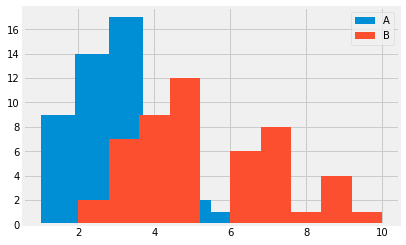

In [8]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.hist(weight_lossA,label='A')
ax.hist(weight_lossB,label='B')
plt.legend()

In [9]:
Avg_loss_A = np.mean(weight_lossA)
Avg_loss_B = np.mean(weight_lossB)
print(f'Average weight loss by GroupA {Avg_loss_A}\nAverage weight loss by GroupB {Avg_loss_B}')
empirical_diff_means = Avg_loss_B-Avg_loss_A
print(f'Mean diffrence is {empirical_diff_means}')

Average weight loss by GroupA 2.82
Average weight loss by GroupB 5.34
Mean diffrence is 2.52


Now that we have a test statistic, we need to decide on a statistical test. The purpose of a statistical test is to work out the likelihood that the result we achieved was due to random chance.<br>-- 
The permutation test is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration.<br>-The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the sampling distribution and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of 2.52


In [10]:
def permutation_sample(data1, data2):
    combined = np.concatenate([data1,data2])
    permuted_data = np.random.permutation(combined)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
    
def mean_diff(data1,data2):
    return np.mean(data1)-np.mean(data2)


In [11]:
def draw_perm_satistc(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates


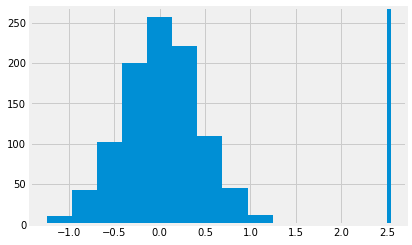

'P is lower tahn threshold, Accept alternative'

In [12]:
mean_differences = draw_perm_satistc(weight_lossA, weight_lossB, func=mean_diff, size=1000)
plt.hist(mean_differences)
plt.axvline(2.52)
plt.show()
p = np.sum(mean_differences >= empirical_diff_means) / len(mean_differences)
def sig_test(p,threshold=0.05):
    if p>=threshold:
        return f'P is high, null will fly: Accept Ho'
    else:
        return f'P is lower tahn threshold, Accept alternative'
sig_test(p=p)

In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we then divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.
This probability is called the p value

In general, it's good practice to set the p value threshold before conducting the study:
--if the p value is less than the threshold, we: